##Ví dụ 1

####Cách 1

In [1]:
import numpy as np
from numpy import linalg
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import cvxopt
import cvxopt.solvers

#Kernel linear: K(u, v) = u^T.v
def linear_kernel(x1, x2):
    return np.dot(x1, x2) # Indented this line

#Kernel poly: K(u, v) = (r + \gamma u^T.v)^d
def polynomial_kernel(x, y, gamma = 1, r = 1, d=3):
    return (r + gamma*np.dot(x, y)) ** d

#Kernel radial basic function (rbf) or gaussian: K(u, v) = e^[-\gamma|u-v|^2]
def gaussian_kernel(x, y, sigma=5.0):
    # gamma = 1.0/(2 * (sigma ** 2))
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

In [2]:
class SVM(object):
    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Solve Quadratic Programming problem
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)

        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers a = \lambda
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

In [3]:
def project(self, X):
    if self.w is not None:
        return np.dot(X, self.w) + self.b
    else:
        y_predict = np.zeros(len(X))
        for i in range(len(X)):
            s = 0
            for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                s += a * sv_y * self.kernel(X[i], sv)
            y_predict[i] = s
        return y_predict + self.b

def predict(self, X):
    return np.sign(self.project(X))

In [4]:
if __name__ == "__main__":
    import pylab as pl
    def gen_lin_separable_data():
        # generate training data in the 2-d case
        return X1, y1, X2, y2
    def gen_non_lin_separable_data():
        return X1, y1, X2, y2
    def gen_lin_separable_overlap_data():
        return X1, y1, X2, y2
    def split_train(X1, y1, X2, y2):
        X1_train = X1[:90]
        y1_train = y1[:90]
        X2_train = X2[:90]
        y2_train = y2[:90]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train
    def split_test(X1, y1, X2, y2):
        X1_test = X1[90:]
        y1_test = y1[90:]
        X2_test = X2[90:]
        y2_test = y2[90:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test
    def plot_margin(X1_train, X2_train, clf):
        pass # Add a pass statement as a placeholder
    def test_linear():
        pass # Add a pass statement as a placeholder
    def test_non_linear():
        pass # Add a pass statement as a placeholder
    def test_soft():
        pass # Add a pass statement as a placeholder
    #test_linear()
    test_non_linear()

####Cách 2

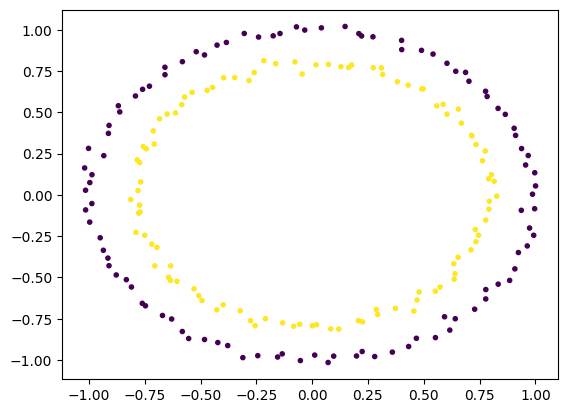

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.datasets import make_circles
# Generate dataset and targets
X, Y = make_circles(n_samples = 200, noise = 0.02)

# visualizing data
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.')
plt.show()

<ipython-input-6-2f04369ec534>:9: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  plt.figure(fignum, figsize=(5, 5))
<ipython-input-6-2f04369ec534>:24: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  plt.figure(fignum, figsize=(5, 5)) # Lưu ý: Lệnh gọi plt.figure thứ hai với cùng fignum


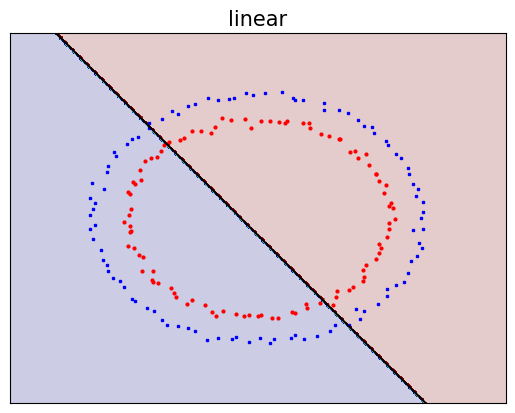

<ipython-input-6-2f04369ec534>:24: UserWarning: Ignoring specified arguments in this call because figure with num: 2 already exists
  plt.figure(fignum, figsize=(5, 5)) # Lưu ý: Lệnh gọi plt.figure thứ hai với cùng fignum


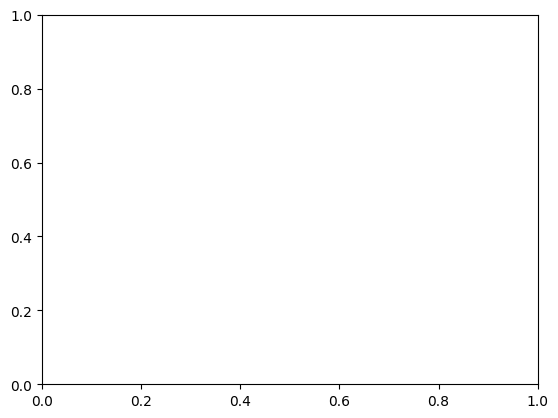

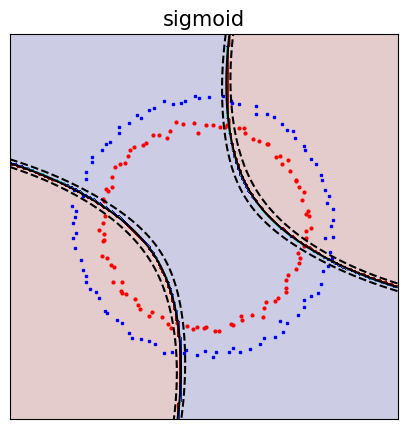

<ipython-input-6-2f04369ec534>:24: UserWarning: Ignoring specified arguments in this call because figure with num: 3 already exists
  plt.figure(fignum, figsize=(5, 5)) # Lưu ý: Lệnh gọi plt.figure thứ hai với cùng fignum


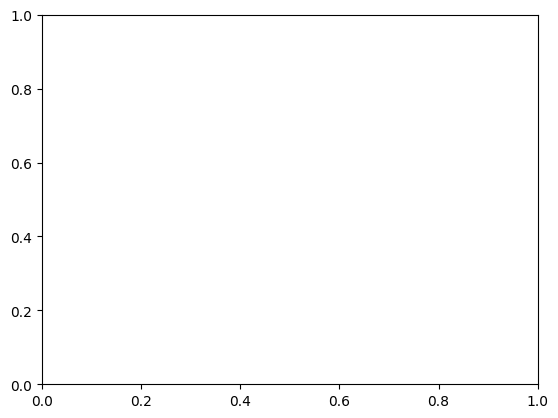

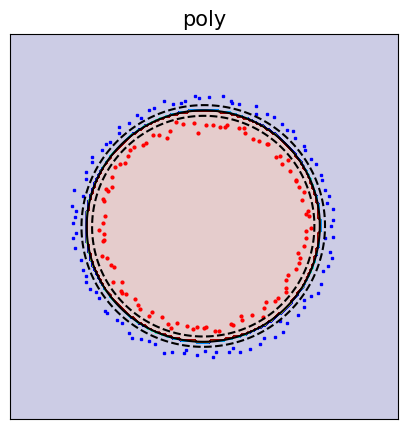

<ipython-input-6-2f04369ec534>:24: UserWarning: Ignoring specified arguments in this call because figure with num: 4 already exists
  plt.figure(fignum, figsize=(5, 5)) # Lưu ý: Lệnh gọi plt.figure thứ hai với cùng fignum


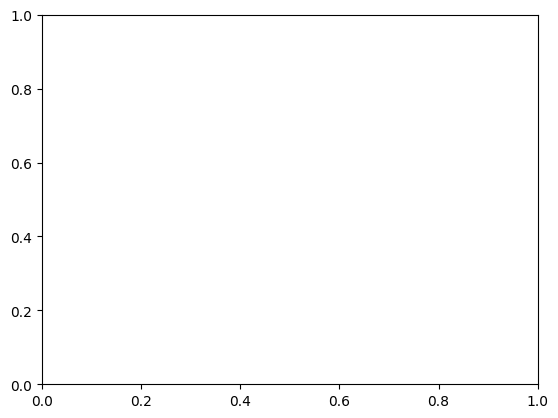

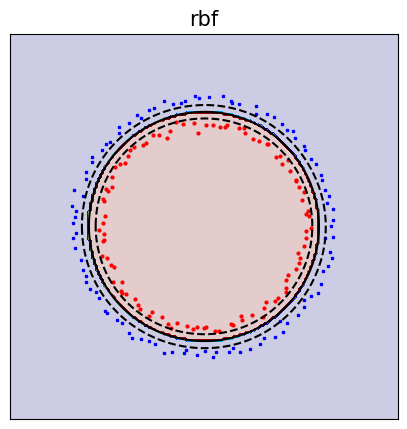

In [6]:
fignum = 1
# fit the model
for kernel in ('linear', 'sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=1, coef0=1)
    clf.fit(X, Y)
    with PdfPages(kernel + '3.pdf') as pdf:
        # plot the line, the points, and the nearest vectors to the plane
        fig, ax = plt.subplots()
        plt.figure(fignum, figsize=(5, 5))
        plt.clf()
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='None') # Thụt dòng cho tham số kéo dài
        plt.plot(X[Y == 0, 0], X[Y == 0, 1], 'bs', markersize=2)
        plt.plot(X[Y == 1, 0], X[Y == 1, 1], 'ro', markersize=2)
        plt.axis('tight')
        x_min = -1.5
        x_max = 1.5
        y_min = -1.5
        y_max = 1.5
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(5, 5)) # Lưu ý: Lệnh gọi plt.figure thứ hai với cùng fignum
        CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha=.2)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5]) # Thụt dòng cho tham số kéo dài
        plt.title(kernel, fontsize=15)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1
        pdf.savefig()
        plt.show()

####Bài 1

ĐÁNH GIÁ MÔ HÌNH KERNEL SVM

--- Kernel: LINEAR ---
Độ chính xác (Accuracy): 0.3667
Ma trận nhầm lẫn (Confusion Matrix):
[[10 22]
 [16 12]]


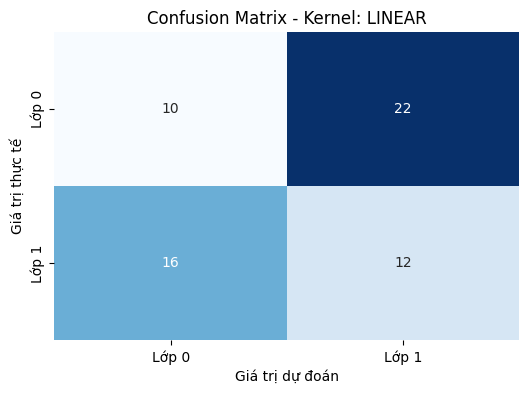


--- Kernel: SIGMOID ---
Độ chính xác (Accuracy): 0.5167
Ma trận nhầm lẫn (Confusion Matrix):
[[16 16]
 [13 15]]


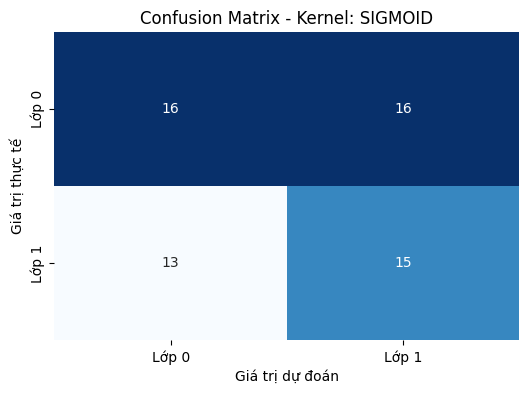


--- Kernel: POLY ---
Độ chính xác (Accuracy): 1.0000
Ma trận nhầm lẫn (Confusion Matrix):
[[32  0]
 [ 0 28]]


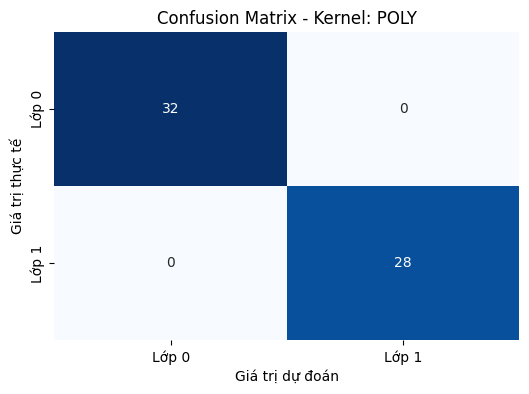


--- Kernel: RBF ---
Độ chính xác (Accuracy): 1.0000
Ma trận nhầm lẫn (Confusion Matrix):
[[32  0]
 [ 0 28]]


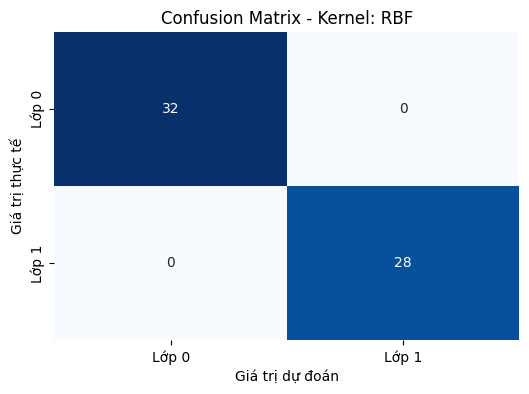

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns # Để vẽ confusion matrix đẹp hơn

# 1. Tạo dữ liệu
X, Y = make_circles(n_samples=200, noise=0.02, random_state=42) #
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 2. Huấn luyện mô hình, dự đoán và đánh giá
print("ĐÁNH GIÁ MÔ HÌNH KERNEL SVM")
print("=" * 30)

for kernel in ('linear', 'sigmoid', 'poly', 'rbf'):
    print(f"\n--- Kernel: {kernel.upper()} ---")

    # Huấn luyện mô hình SVM với kernel tương ứng
    clf = svm.SVC(kernel=kernel, gamma='scale', coef0=1) # Sử dụng gamma='scale' cho giá trị mặc định tốt hơn
    if kernel == 'poly':
        clf = svm.SVC(kernel=kernel, degree=3, gamma='scale', coef0=1) # Thêm degree cho poly

    clf.fit(X_train, Y_train)

    # Dự đoán trên tập test
    Y_pred = clf.predict(X_test)

    # Tính toán Độ chính xác (Accuracy)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Độ chính xác (Accuracy): {accuracy:.4f}")

    # Tính toán và hiển thị Ma trận nhầm lẫn (Confusion Matrix)
    cm = confusion_matrix(Y_test, Y_pred)
    print("Ma trận nhầm lẫn (Confusion Matrix):")
    print(cm)

    # (Tùy chọn) Vẽ ma trận nhầm lẫn cho trực quan hơn
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Lớp 0', 'Lớp 1'], yticklabels=['Lớp 0', 'Lớp 1'])
    plt.xlabel('Giá trị dự đoán')
    plt.ylabel('Giá trị thực tế')
    plt.title(f'Confusion Matrix - Kernel: {kernel.upper()}')
    plt.show()

##Ví dụ 2

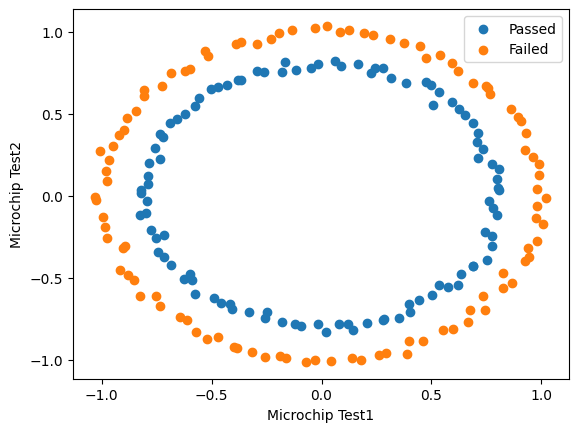

<ipython-input-8-e0b463ae09b1>:25: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  plt.figure(fignum, figsize=(5, 5))
<ipython-input-8-e0b463ae09b1>:49: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  plt.figure(fignum, figsize=(5, 5))


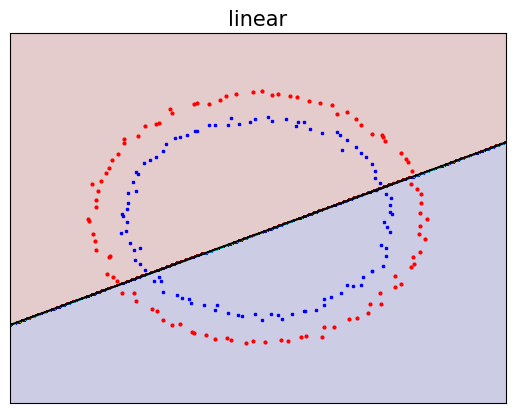

<ipython-input-8-e0b463ae09b1>:49: UserWarning: Ignoring specified arguments in this call because figure with num: 2 already exists
  plt.figure(fignum, figsize=(5, 5))


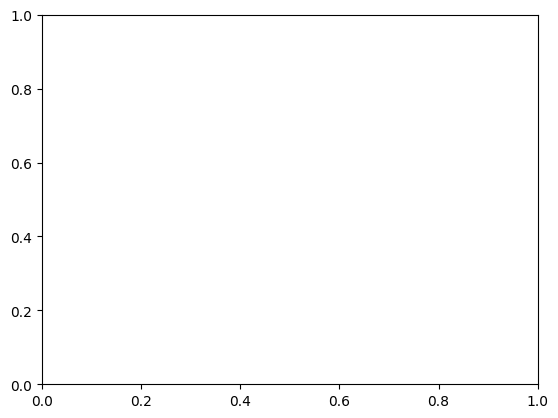

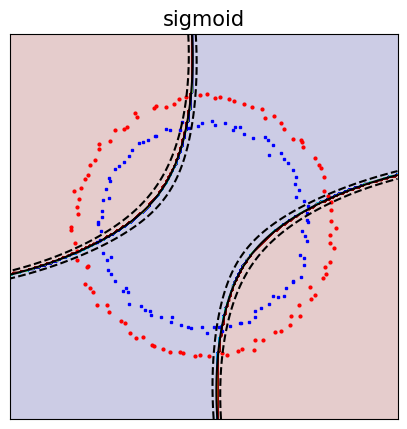

<ipython-input-8-e0b463ae09b1>:49: UserWarning: Ignoring specified arguments in this call because figure with num: 3 already exists
  plt.figure(fignum, figsize=(5, 5))


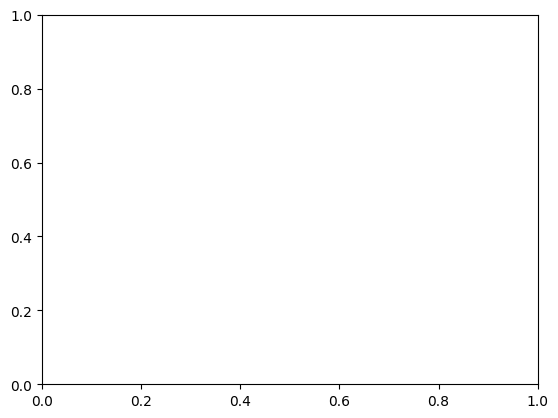

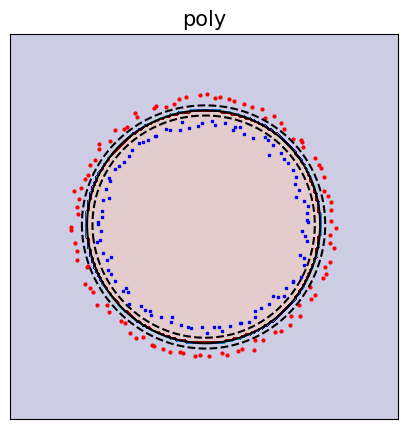

<ipython-input-8-e0b463ae09b1>:49: UserWarning: Ignoring specified arguments in this call because figure with num: 4 already exists
  plt.figure(fignum, figsize=(5, 5))


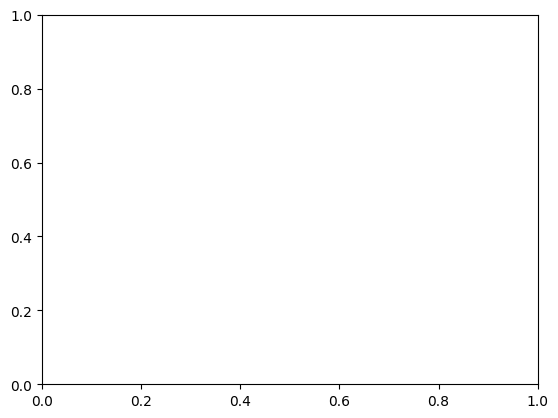

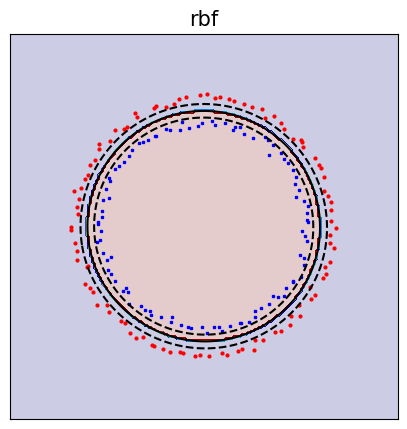

In [8]:
import matplotlib.pyplot as plt
from sklearn import svm
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np # Đảm bảo đã import numpy

mask = (Y == 1) # Tạo mask boolean

passed = plt.scatter(X[mask, 0], X[mask, 1]) # Lấy cột 0 và cột 1 của các hàng thỏa mãn mask
failed = plt.scatter(X[~mask, 0], X[~mask, 1]) # Lấy cột 0 và cột 1 của các hàng không thỏa mãn mask

plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

# Tương tự Ví dụ 1, chúng ta sẽ sử dụng các nhân có trong thư viện sklearn để phân loại dữ liệu
fignum = 1
# fit the model
for kernel in ('linear', 'sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=1, coef0=1)
    clf.fit(X, Y) # Huấn luyện trên toàn bộ X, Y
    with PdfPages(kernel + '3.pdf') as pdf:
        # plot the line, the points, and the nearest vectors to the plane
        fig, ax = plt.subplots()
        plt.figure(fignum, figsize=(5, 5))
        plt.clf()
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='None')

        # Sửa lỗi ở đây: sử dụng indexing của NumPy cho phần plot dữ liệu gốc
        plt.plot(X[mask, 0], X[mask, 1], 'bs', markersize=2)
        plt.plot(X[~mask, 0], X[~mask, 1], 'ro', markersize=2)

        plt.axis('tight')
        x_min = -1.5
        x_max = 1.5
        y_min = -1.5
        y_max = 1.5

        # Nếu X_min, X_max, Y_min, Y_max không phù hợp với dữ liệu, bạn có thể tính toán chúng từ X
        # x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        # y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5


        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(5, 5))
        CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha=.2)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])
        plt.title(kernel, fontsize=15)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1
        pdf.savefig()
        plt.show()

####Bài tập tự thực hành 2


Đánh giá mô hình Kernel SVM trên tập dữ liệu từ dataset.csv:

--- Kernel: LINEAR ---
Độ chính xác (Accuracy): 0.9000
Ma trận nhầm lẫn (Confusion Matrix):
[[66  2]
 [ 8 24]]


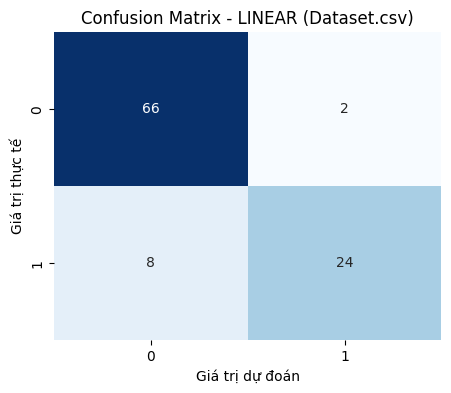


--- Kernel: POLY ---
Độ chính xác (Accuracy): 0.8600
Ma trận nhầm lẫn (Confusion Matrix):
[[67  1]
 [13 19]]


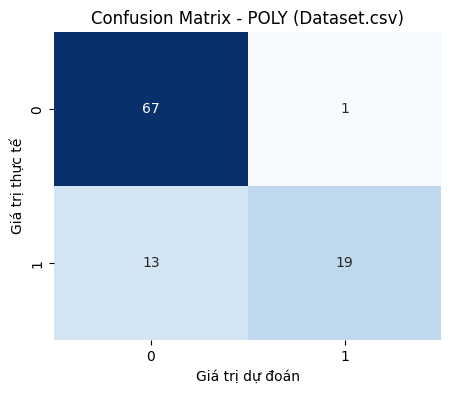


--- Kernel: RBF ---
Độ chính xác (Accuracy): 0.9300
Ma trận nhầm lẫn (Confusion Matrix):
[[64  4]
 [ 3 29]]


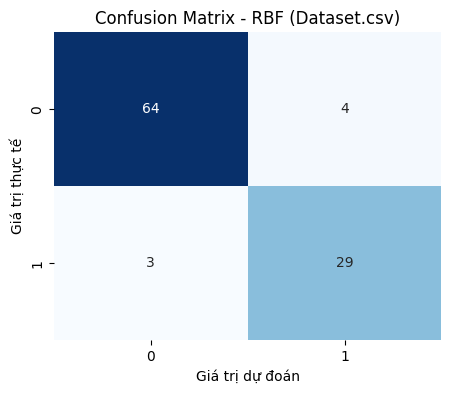


--- Kernel: SIGMOID ---
Độ chính xác (Accuracy): 0.7400
Ma trận nhầm lẫn (Confusion Matrix):
[[54 14]
 [12 20]]


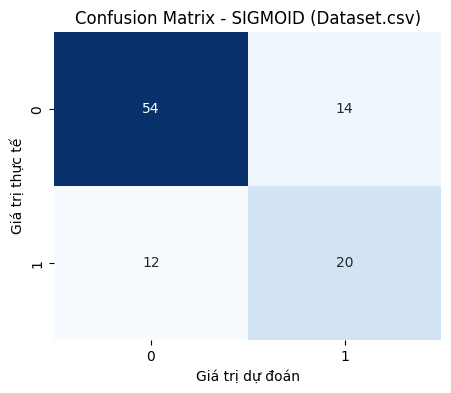

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


dataset = pd.read_csv('/content/dataset.csv') # Giả sử file nằm cùng thư mục

X_ex2 = dataset.iloc[:, :-1].values # Lấy tất cả các cột trừ cột cuối cùng làm features
y_ex2 = dataset.iloc[:, -1].values  # Lấy cột cuối cùng làm target

# 2. Chia dữ liệu thành Training set và Test set
X_train_ex2, X_test_ex2, y_train_ex2, y_test_ex2 = train_test_split(
    X_ex2, y_ex2, test_size=0.25, random_state=0
) #

# 3. Feature Scaling (Chuẩn hóa dữ liệu)
sc_ex2 = StandardScaler()
X_train_ex2 = sc_ex2.fit_transform(X_train_ex2) #
X_test_ex2 = sc_ex2.transform(X_test_ex2)       #

# 4. Huấn luyện mô hình Kernel SVM với các nhân khác nhau và đánh giá
kernels_ex2 = ['linear', 'poly', 'rbf', 'sigmoid']
results_ex2 = {}

print("\nĐánh giá mô hình Kernel SVM trên tập dữ liệu từ dataset.csv:")
for kernel_name in kernels_ex2:
    print(f"\n--- Kernel: {kernel_name.upper()} ---")
    # Khởi tạo và huấn luyện mô hình
    model_ex2 = SVC(kernel=kernel_name, random_state=0, gamma='scale') # gamma='scale' là giá trị mặc định tốt
    if kernel_name == 'poly':
        model_ex2 = SVC(kernel=kernel_name, degree=3, random_state=0, gamma='scale') # Thêm degree cho poly

    model_ex2.fit(X_train_ex2, y_train_ex2)

    # Dự đoán trên tập Test
    y_pred_ex2 = model_ex2.predict(X_test_ex2)

    # Đánh giá mô hình
    accuracy_ex2 = accuracy_score(y_test_ex2, y_pred_ex2)
    cm_ex2 = confusion_matrix(y_test_ex2, y_pred_ex2)
    results_ex2[kernel_name] = {'accuracy': accuracy_ex2, 'confusion_matrix': cm_ex2}

    print(f"Độ chính xác (Accuracy): {accuracy_ex2:.4f}")
    print("Ma trận nhầm lẫn (Confusion Matrix):")
    print(cm_ex2)

    # (Tùy chọn) Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_ex2, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - {kernel_name.upper()} (Dataset.csv)')
    plt.xlabel('Giá trị dự đoán')
    plt.ylabel('Giá trị thực tế')
    plt.show()

####Bài tập tự thực hành 3

Thông tin tập dữ liệu ung thư vú:
Tên các đặc trưng (Features): ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Tên các lớp (Target names): ['malignant' 'benign']

Đánh giá mô hình Kernel SVM trên tập dữ liệu Ung thư vú:

--- Kernel: LINEAR ---
Độ chính xác (Accuracy): 0.9766
Ma trận nhầm lẫn (Confusion Matrix):
[[ 61   2]
 [  2 106]]


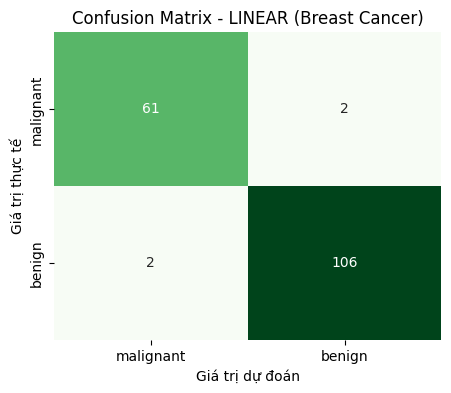


--- Kernel: POLY ---
Độ chính xác (Accuracy): 0.8947
Ma trận nhầm lẫn (Confusion Matrix):
[[ 45  18]
 [  0 108]]


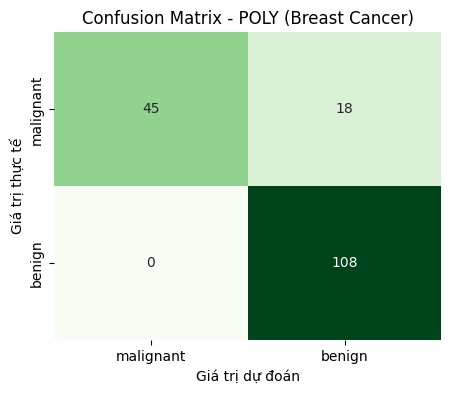


--- Kernel: RBF ---
Độ chính xác (Accuracy): 0.9766
Ma trận nhầm lẫn (Confusion Matrix):
[[ 61   2]
 [  2 106]]


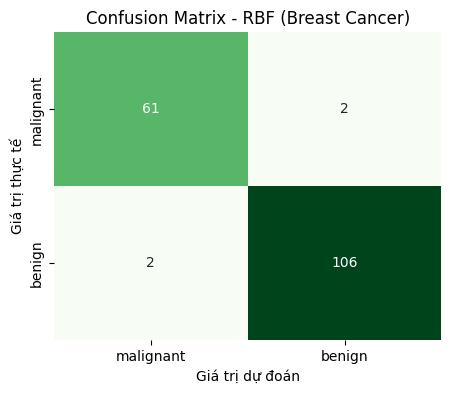


--- Kernel: SIGMOID ---
Độ chính xác (Accuracy): 0.9649
Ma trận nhầm lẫn (Confusion Matrix):
[[ 61   2]
 [  4 104]]


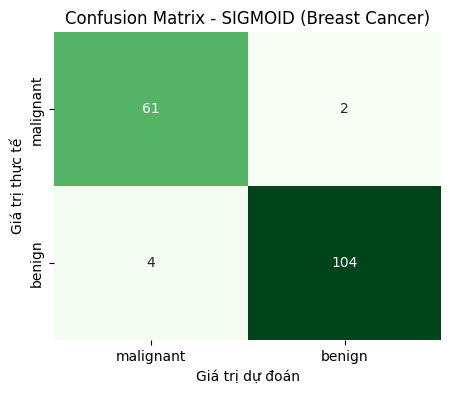

In [10]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Tải dữ liệu ung thư vú từ sklearn.datasets
cancer_data = load_breast_cancer() #
X_ex3 = cancer_data.data
y_ex3 = cancer_data.target

print("Thông tin tập dữ liệu ung thư vú:")
print("Tên các đặc trưng (Features):", cancer_data.feature_names)
print("Tên các lớp (Target names):", cancer_data.target_names)
# Lưu ý: target_names là ['malignant' 'benign'], tương ứng với y là [0 1]
# sklearn SVM có thể xử lý trực tiếp nhãn 0 và 1.

# 2. Chia dữ liệu thành Training set và Test set
# Tài liệu không chỉ định test_size và random_state, sử dụng giá trị phổ biến.
X_train_ex3, X_test_ex3, y_train_ex3, y_test_ex3 = train_test_split(
    X_ex3, y_ex3, test_size=0.3, random_state=42
)

# 3. Feature Scaling (Chuẩn hóa dữ liệu)
sc_ex3 = StandardScaler()
X_train_ex3 = sc_ex3.fit_transform(X_train_ex3)
X_test_ex3 = sc_ex3.transform(X_test_ex3)

# 4. Huấn luyện mô hình Kernel SVM với các nhân khác nhau và đánh giá
kernels_ex3 = ['linear', 'poly', 'rbf', 'sigmoid']
results_ex3 = {}

print("\nĐánh giá mô hình Kernel SVM trên tập dữ liệu Ung thư vú:")
for kernel_name in kernels_ex3:
    print(f"\n--- Kernel: {kernel_name.upper()} ---")
    # Khởi tạo và huấn luyện mô hình
    model_ex3 = SVC(kernel=kernel_name, random_state=42, gamma='scale')
    if kernel_name == 'poly':
        model_ex3 = SVC(kernel=kernel_name, degree=3, random_state=42, gamma='scale')

    model_ex3.fit(X_train_ex3, y_train_ex3)

    # Dự đoán trên tập Test
    y_pred_ex3 = model_ex3.predict(X_test_ex3)

    # Đánh giá mô hình
    accuracy_ex3 = accuracy_score(y_test_ex3, y_pred_ex3)
    cm_ex3 = confusion_matrix(y_test_ex3, y_pred_ex3)
    results_ex3[kernel_name] = {'accuracy': accuracy_ex3, 'confusion_matrix': cm_ex3}

    print(f"Độ chính xác (Accuracy): {accuracy_ex3:.4f}")
    print("Ma trận nhầm lẫn (Confusion Matrix):")
    print(cm_ex3)

    # (Tùy chọn) Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_ex3, annot=True, fmt="d", cmap="Greens", cbar=False,
                xticklabels=cancer_data.target_names, yticklabels=cancer_data.target_names)
    plt.title(f'Confusion Matrix - {kernel_name.upper()} (Breast Cancer)')
    plt.xlabel('Giá trị dự đoán')
    plt.ylabel('Giá trị thực tế')
    plt.show()